# Tagup Data Science Exercise

ExampleCo, Inc is gathering several types of data for its fleet of very expensive machines.  These very expensive machines have three operating modes: *normal*, *faulty* and *failed*.   The machines run all the time, and usually they are in normal mode.  However, in the event that the machine enters faulty mode, the company would like to be aware of this as soon as possible.  This way they can take preventative action to avoid entering failed mode and hopefully save themselves lots of money.

They collect four kinds of timeseries data for each machine in their fleet of very expensive machines.  When a machine is operating in *normal* mode the data behaves in a fairly predictable way, but with a moderate amount of noise.  Before a machine fails it will ramp into *faulty* mode, during which the data appears visibly quite different.  Finally, when a machine fails it enters a third, and distinctly different, *failed* mode where all signals are very close to 0.

You can download the data here: [exampleco_data](https://drive.google.com/open?id=1b12u6rzkG1AxB6wLGl7IBVoaoSoZLHNR)

__Your main objective: to develop an automated method to pinpoint the times of fault and failure in this machine__.  Keep in mind that you will be sharing these results with the executives at ExampleCo, so to the best of your ability, try to explain what you are doing, what you've shown, and why you think your predictions are good.


A few notes to help:
1. A good place to start is by addressing the noise due to communication
   errors.
2. Feel free to use any libraries you like, or even other programming
   languages. Your final results should be presented in this notebook, however.
3. There are no constraints on the techniques you bring to bear, we are curious
   to see how you think and what sort of resources you have in your toolbox.
4. Be sure to clearly articulate what you did, why you did it, and how the
   results should be interpreted. In particular you should be aware of the
   limitations of whatever approach or approaches you take.
5. Don't feel compelled to use all the data if you're not sure how. Feel free
   to focus on data from a single unit if that makes it easier to get started.
6. Don't hesitate to reach out to datasciencejobs@tagup.io with any questions!

In [1]:
# To help you get started...
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams['figure.figsize'] = 5,4
plt.style.use('seaborn-whitegrid')

In [2]:
cd exampleco_data/

/Users/srikanthadavalli/DataScience/challenges/data-science/exampleco_data


In [3]:
data = pd.read_csv('machine_0.csv')

# plt.plot(range(len(data)), data)
# plt.show
# data.shape
data.rename( columns={'Unnamed: 0':'Time'}, inplace=True )
data.head()



Time          0         1          2          3
0  00:00.0  12.626096  8.803120 -11.809200  10.083961
1  00:09.6  10.831994  2.816327  11.554778  21.892853
2  00:19.2  21.083510 -0.672645 -17.839178  -1.349024
3  00:28.8  32.294495  6.525132 -13.498586  -4.250752
4  00:38.4  28.057100  3.691359  21.984744  13.670561

In [4]:
data.describe()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3000 non-null   object 
 1   0       3000 non-null   float64
 2   1       3000 non-null   float64
 3   2       3000 non-null   float64
 4   3       3000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.3+ KB
None


### Preprocessing

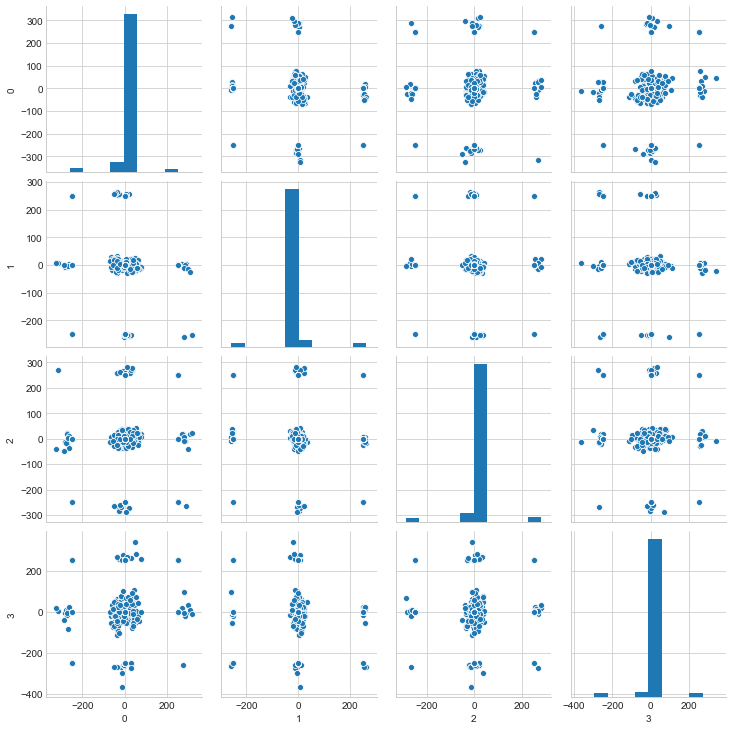

In [5]:
sb.pairplot(data)

In [6]:
data.corr()
data['Time'].value_counts()

00:00.0    2
53:50.3    1
32:13.8    1
36:51.1    1
43:53.7    1
          ..
21:37.6    1
56:37.1    1
55:39.5    1
02:27.6    1
06:20.5    1
Name: Time, Length: 2999, dtype: int64

### Converting to time object

In [7]:
data['Time'] = pd.timedelta_range(0, periods=3000, freq='9T6S')
data.head()

Time          0         1          2          3
0 00:00:00  12.626096  8.803120 -11.809200  10.083961
1 00:09:06  10.831994  2.816327  11.554778  21.892853
2 00:18:12  21.083510 -0.672645 -17.839178  -1.349024
3 00:27:18  32.294495  6.525132 -13.498586  -4.250752
4 00:36:24  28.057100  3.691359  21.984744  13.670561

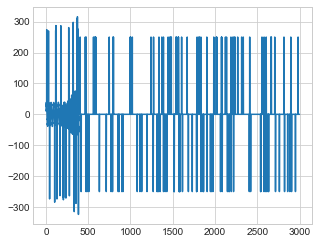

In [8]:
zero = data['0']
zero.plot()

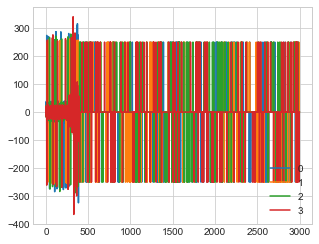

In [9]:
timeserie = data[['0','1','2','3']]
timeserie.plot()

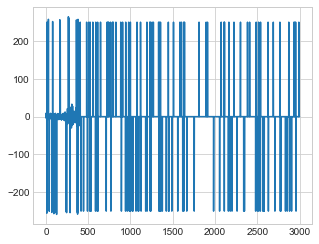

In [10]:
one = data['1']
one.plot()


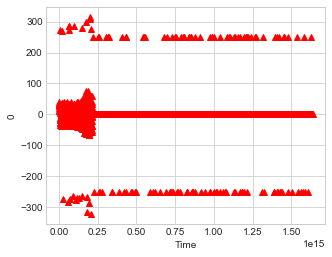

In [11]:
plt.plot(data['Time'],data['0'], 'r^')
plt.xlabel('Time')
plt.ylabel('0')
plt.show()

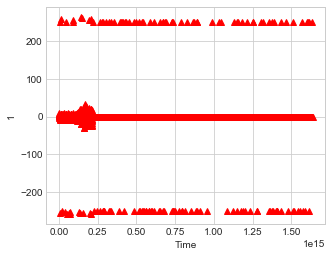

In [12]:
plt.plot(data['Time'],data['1'], 'r^')
plt.xlabel('Time')
plt.ylabel('1')
plt.show()

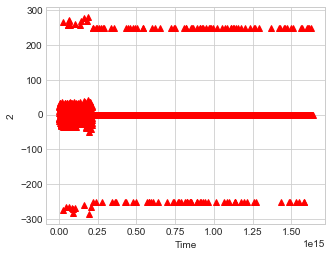

In [13]:
plt.plot(data['Time'],data['2'], 'r^')
plt.xlabel('Time')
plt.ylabel('2')
plt.show()

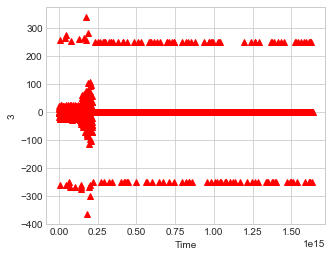

In [14]:
plt.plot(data['Time'],data['3'], 'r^')
plt.xlabel('Time')
plt.ylabel('3')
plt.show()

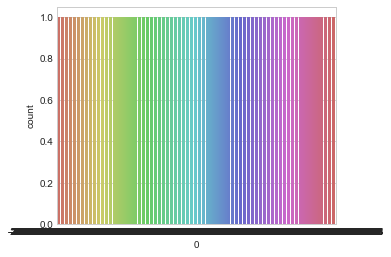

In [15]:
sb.countplot(x='0', data = data, palette='hls')


### Converting categorical variables to dummy variables

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
zero_dummy = data['0']
zero_encoded=label_encoder.fit_transform(zero_dummy)
zero_encoded[0:100]

array([2790, 2783, 2821, 2871, 2851, 2862, 2901, 2876, 2839, 2861, 2991,
       2775, 2771, 2758,  224,  207,  210,  162,  128,  154,  137,  108,
        153,  182,  167,  204,  252,  249, 2747, 2808, 2817, 2989, 2870,
       2891, 2857, 2878, 2893, 2837, 2816, 2826, 2778,  257,  260,  232,
          6,  181,  173,  121,  126,  156,  133,  134,  195,  206,  205,
        256, 2766, 2759, 2805, 2853, 2840, 2850, 2899, 2883, 2846, 2875,
       2852, 2796, 2793, 2785,  244,  222,  226,  180,  139,  165,  143,
        105,  144,  170,  146,  186,  234,  230,  250, 2789, 2799, 2801,
       2858, 2882, 2849, 2881, 2896, 2847, 2835, 2844, 2798, 2751, 2757,
        251])